In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
img_size = (64, 64)
batch_size = 8

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/dell/Documents/Projects/Current/img-class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' if more than 2 classes
    classes=['A', 'B']
)


Found 28 images belonging to 2 classes.


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Change to appropriate number for multiple classes
])

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multiple classes
              metrics=['accuracy'])

In [24]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

Epoch 1/10


4/4 [==============================] - 1s 30ms/step - loss: 2.2547 - accuracy: 0.3571
Epoch 2/10
4/4 [==============================] - 0s 25ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 25ms/step - loss: 0.6943 - accuracy: 0.4286
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6818 - accuracy: 0.5714
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6612 - accuracy: 0.8214
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6303 - accuracy: 0.9643
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.5698 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 26ms/step - loss: 0.4919 - accuracy: 0.8929
Epoch 9/10
4/4 [==============================] - 0s 23ms/step - loss: 0.3583 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 26ms/step - loss: 0.2506 - accuracy: 1.0000


In [27]:
# Define the test data generator
import numpy as np
import matplotlib.pyplot as plt
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/dell/Documents/Projects/Current/img-class/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' if more than 2 classes
    classes=['A', 'B'],
    shuffle=False  # Important: Keep the order of predictions
)



Found 12 images belonging to 2 classes.


2/2 [==============================] - 0s 6ms/step
Accuracy: 1.0


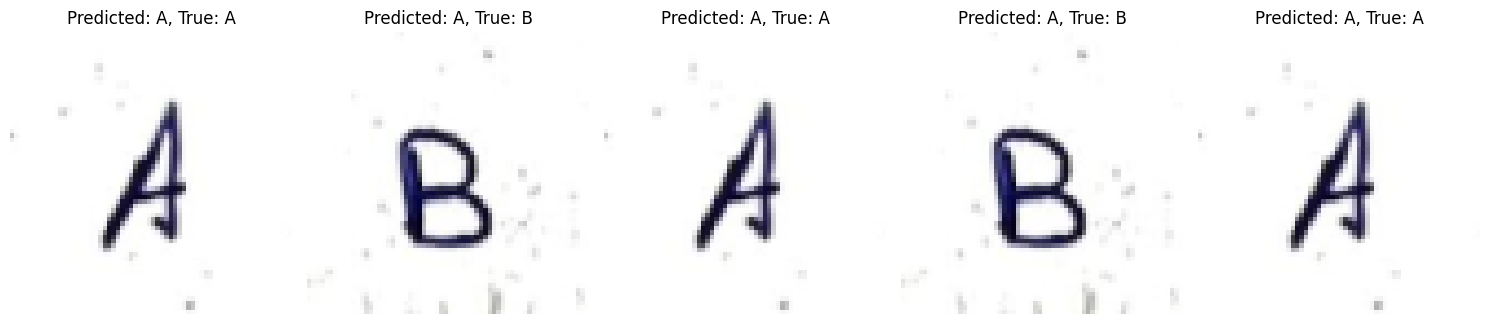

In [30]:
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).flatten()  # Convert probabilities to classes (0 or 1)

# Get true classes
true_classes = test_generator.classes

# Calculate accuracy score
accuracy = np.mean(predicted_classes == true_classes)
print(f"Accuracy: {accuracy}")

# Display sample images with their predicted and true classes
num_images_to_display = 5
plt.figure(figsize=(15, 6))

for i in range(num_images_to_display):
    image, true_label = test_generator.next()  # Load an image batch from the generator
    predicted_label = predicted_classes[i]  # Get predicted label for the image

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image[0])  # Display the first image from the batch
    plt.title(f"Predicted: {'A' if predicted_label == 0 else 'B'}, True: {'A' if true_label[0] == 0 else 'B'}")
    plt.axis('off')

plt.tight_layout()
plt.show()